# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 4 Цвета и цветовая палитра

### Содержание главы

1. Цвет как декортивный элемент;

2. Способы задания цветов. RGB и HEX;

3. Цветовая палитра colormap;

4. Плавная цветовая палитра;

5. Дискретная цветовая палитра.

Цвет является одним из важнейших выразительных средств художника (а все мы являемся художниками, когда создаём рисунки). Чёрно-белая графика имеет свои эстетические достоинства и практическую выгоду (экономия краски при печати), но в ряде случаев без использования цвета не обойтись.

Цвет может быть задан либо через пропорции трёх базовых цветов: красного, зелёного и синего. Такой способ носит название RGB. Другим стандартным методом является использование шестнадцатиричной кодировки (HEX), которая широко применяется в HTML. В не зависимости от способа задания цвета нужно понимать, какой цвет получается при той или иной комбинации. В этом могут помочь специальные редакторы, ссылки на которые расположены ниже.

Многообразие сочетаний цветов порождает массу наборов цветов - цветовые палитры. Они нужны в качестве основы для отображения цветовых легенд или цветовых шкал, где каждому оттенку цвета шкалы сопоставляется какое-то значение. Также цветовые шкалы применяются там, где нужно динамически подбирать цвет, например, при создании цветных графиков временных рядов нескольких величин.

### Электронные ресурсы:

+ [Сокращения и условные обозначения цветов](http://matplotlib.org/examples/color/named_colors.html);

+ [Цветовая палитра colormap](http://matplotlib.org/users/colormaps.html);

+ [Предустановленные наборы цветовых палитр](http://matplotlib.org/examples/color/colormaps_reference.html);

+ [Пример создания пользовательской цветовой палитры](http://matplotlib.org/examples/pylab_examples/custom_cmap.html);

+ [Рецепты по созданию цветовой палитры от scipy cookbook](http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps).

Сторонние ресурсы для подбора цветовой палитры

+ [Подбор цветов для цветовой палитры](http://colormap.org/);

+ [Подобор цветов от Adobe Color CC](https://color.adobe.com/ru/create/color-wheel/);

+ [Таблица безопасных цветов (RGB/HEX)от студии Артемия Лебедева](https://www.artlebedev.ru/tools/colors/);

+ [О цветовых палитрах с сайта PYHOGS](http://pyhogs.github.io/colormap-examples.html).

### 4.1 Цвет как декортивный элемент

Цвет - это один из самых распространённых способ отобразить информацию. Во многом презентабельность и читаемость рисунка зависит от подобранных цветов. В научной графике, как правило, уделяется достаточно мало внимания подборке сочетания цветов, важна однозначность идентификации по цвету.

Matplotlib предоставляет широкие возможности для работы с цветом. Существует ряд предустановленных цветов, которые имеют следующие аббревиатуры:

+ **Красный** - 'red', 'r', (1.0, 0.0, 0.0);

+ **Оранженвый** - 'orange';

+ **Жёлтый** - 'yellow', 'y', (0.75, 0.75, 0);

+ **Зелёный** - 'green', 'g', (0.0, 0.5, 0.0);

+ **Голубой** - 'cyan', 'c', (0.0, 0.75, 0.75);

+ **Синий** - 'blue', 'b', (0.0, 0.0, 1.0);

+ **Фиолетовый** - 'magenta', 'm', (0.75, 0, 0.75);

+ **Чёрный** - 'black', 'k', (0.0, 0.0, 0.0);

+ **Белый** -'white', 'w', (1.0, 1.0, 1.0).

Цветовую гамму можно разнообразить за счёт различной степени прозрачности параметра alpha. Но если нужно задать конкретно, скажем, алый цвет, то нужна пользовательская настройка. Matplotlib отображает цвет, заданный как в формате RGB, так и в HEX. Существуют [различные таблицы цветов](https://www.artlebedev.ru/tools/colors/), в которых представленным оттенкам соответствует код в RGB или HEX формате. Ими удобно пользоваться при составлении небольших пользовательских цветовых палитр.

### 4.2 Способы задания цветов. RGB и HEX

[Цвет в формате RGB](https://ru.wikipedia.org/wiki/RGB) представляет собой триплет или кортеж, состоящий из трёх целых значений от 0 до 255 для красного, зелёного и синего цветов. Различные сочетания этих трёх значений позволяет получить огромное количество оттенков и цветов.

В matplotlib цвета rgb значения задаются в относительных единицах, в диапазоне от [0, 1]. Если необходимый цвет задан в диапазоне [0, 255], то нужно просто поделить их на 255.

Цвет, представленный в формате HEX, передаётся в виде шестнадцатеричной html строки (символ # перед шестизначным значением обязателен).

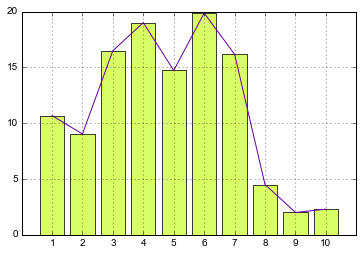

In [2]:
# Пример 4.2

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)   # добавление области рисования ax

N = 10
x = np.arange(1, N+1, 1)
y = 20.*np.random.rand(N)

rgb = np.array([204,255,51])/255.
myhex = '#660099'

ax.plot(x, y, color=myhex)
ax.bar(x, y, color=rgb, alpha=0.75, align='center')

ax.set_xticks(x)   # установка делений на оси OX
ax.set_xlim(np.min(x)-1, np.max(x)+1)   # ограничение области изменения по оси OX
ax.grid(True)

save('pic_4_2', fmt='png')
save('pic_4_2', fmt='pdf')

plt.show()

### 4.3 Цветовая палитра colormap

Последовательность или набор цветов образует цветовую палитру colormap. Чаще всего она используется при отрисовке трёхмерных данных. Но и автоматический подбор цветов при добавлении каждого нового экземпляра plot также осуществляется из цветовой палитры по умолчанию.

Для получения текущей цветовой палитры можно воспользоваться методом `plt.get_cmap('название палитры')`. Список всех предустановленных палитр можно получить с помощью метода plt.cm.datad. В настройках matplotlibrc можно также изменить цветовую палитру с помощью параметра `image.cmap`. В интерактивном режиме её можно поменять через `plt.rcParams['image.cmap']='имя_палитры'` или через `plt.set_cmap('имя_палитры')`. Последний позволяет изменить палитру текущего рисунка уже после вызова графических команд.

(u'\u041f\u0440\u0435\u0434\u0443\u0441\u0442\u0430\u043d\u043e\u0432\u043b\u0435\u043d\u043d\u044b\u0435 \u0446\u0432\u0435\u0442\u043e\u0432\u044b\u0435 \u043f\u0430\u043b\u0438\u0442\u0440\u044b:', [u'Spectral', u'summer', u'coolwarm', u'Wistia_r', u'pink_r', u'Set1', u'Set2', u'Set3', u'brg_r', u'Dark2', u'hot', u'PuOr_r', u'afmhot_r', u'terrain_r', u'PuBuGn_r', u'RdPu', u'gist_ncar_r', u'gist_yarg_r', u'Dark2_r', u'YlGnBu', u'RdYlBu', u'hot_r', u'gist_rainbow_r', u'gist_stern', u'gnuplot_r', u'cool_r', u'cool', u'gray', u'copper_r', u'Greens_r', u'GnBu', u'gist_ncar', u'spring_r', u'gist_rainbow', u'RdYlBu_r', u'gist_heat_r', u'Wistia', u'OrRd_r', u'CMRmap', u'bone', u'gist_stern_r', u'RdYlGn', u'Pastel2_r', u'spring', u'terrain', u'YlOrRd_r', u'Set2_r', u'winter_r', u'PuBu', u'RdGy_r', u'spectral', u'flag_r', u'jet_r', u'RdPu_r', u'Purples_r', u'gist_yarg', u'BuGn', u'Paired_r', u'hsv_r', u'bwr', u'cubehelix', u'YlOrRd', u'Greens', u'PRGn', u'gist_heat', u'spectral_r', u'Paired',

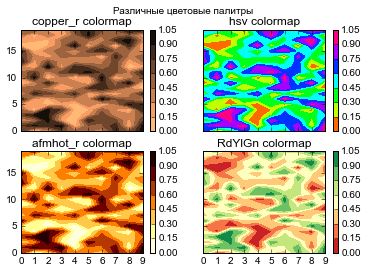

In [3]:
# Пример 4.3

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

dat = np.random.random(200).reshape(20,10) # создаём матрицу значений

# Создаём список цветовых палитр из словаря
maps = [m for m in plt.cm.datad]
# или так
maps = []

for i, m in enumerate(plt.cm.datad):
    maps.append(m)
#    print('%d - %s' % (i, m))

print(u'Предустановленные цветовые палитры:', maps)

fig, axes= plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

cmaplist = plt.cm.datad

for ax in fig.axes:
    random_cmap = np.random.choice(maps)
    cf = ax.contourf(dat, cmap=plt.get_cmap(random_cmap))
    ax.set_title('%s colormap' % random_cmap)
    fig.colorbar(cf, ax=ax)
    
plt.suptitle(u'Различные цветовые палитры')   # единый заголовок рисунка

save('pic_4_3', fmt='png')
save('pic_4_3', fmt='pdf')

plt.show()

Всё многообразие цветовых палитр можно разбить на два типа:

+ плавная палитра LinearSegmentedColormap 

+ дискретная палитра ListedColormap. 

Первая используется для создания всех встроенных экземпляров colormap, а также очень полезна при создании пользовательских цветовых шкал. Вторая используется для создания пользовательской цветовой палитры colormap из заданного списка цветов.

### 4.4 Плавная цветовая палитра

Плавная цветовая палитра представляет собой результат линейной интерполяции между последовательностью цветов, составляющих основу палитры. 

Различные методы отображения трёхмерных данных (разные графические команды) по умолчанию используют разные типы цветовых палитр. Так методы `plt.imshow()` и `plt.pcolor()` будут сопровождаться плавной цветовой палитрой:

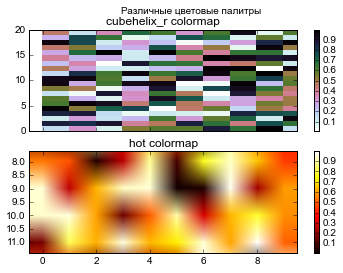

In [4]:
# Пример 5.4.1

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

dat = np.random.random(200).reshape(20,10) # создаём матрицу значений

# Создаём список цветовых палитр из словаря
maps = [m for m in plt.cm.datad]
# или так
maps = []
for m in plt.cm.datad:
    maps.append(m)

fig, axes= plt.subplots(nrows=2, ncols=1, sharex=True)   # смотри главу "Рисунки с несколькими областями рисования"

cmaplist = plt.cm.datad

for i, ax in enumerate(fig.axes):
    random_cmap = np.random.choice(maps)
    if(i == 0):
        cf = ax.pcolor(dat, cmap=plt.get_cmap(random_cmap))
    else:
        cf = ax.imshow(dat, cmap=plt.get_cmap(random_cmap))        

    ax.set_title('%s colormap' % random_cmap)
    
    fig.colorbar(cf, ax=ax)

plt.suptitle(u'Различные цветовые палитры')

save('pic_5_4_1', fmt='png')
save('pic_5_4_1', fmt='pdf')

plt.show()

Чтобы создать пользовательскую плавную цветовую палитру нужно, во-первых, определиться с её основными цветами. Пусть мы выбрали следующее сочетание цветов: розовый, синий, зелёный, оранжевый и красный. В представлении RGB это означает спискок следующих значений:

+ розовый - rgb(150, 0, 0), ;

+ синий - rgb(0, 0, 255),

+ зелёный - rgb(0, 255, 0),

+ оранжевый - rgb(255, 150, 0),

+ красный - rgb(255, 0, 0),

Matplotlib работает с rgb в относительных единицах, поэтому классические значения rgb триплетов нужно поделить на 255.

После этого нужно создать "словарь палитры" cdict. Это словарь для каждого из оттенков RGB ('red', 'blue', 'green'), где каждому оттенку приписан список или кортеж (x, y0, y1):

+ x - определяет положение в палитре в диапазоне [0,1]. Проще представить будущую палитру в виде шкалы от 0 до 1;

+ y0 - значение цвета в относительных единицах ([0, 255] -> [0, 1]) с одной стороны (слева) от положения x;

+ y1 - значение цвета ([0, 255] -> [0, 1]) с другой стороны (справа) от положения x.

Между заданными позициями x метод LinearSegmentedColormap линейно интерполирует значения цветов между (x_i - y1_i) и (x_i+1 - y0_i). Обычно y0 и y1 совпадают, но, используя разные значения, можно добиваться более сложых эффектов, например разрывов в палитре. 

[ 127.5    0.    25.5]


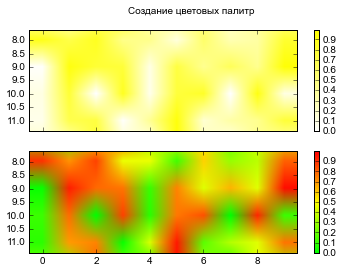

In [5]:
# Пример 5.4.2

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

dat = np.random.random(200).reshape(20,10) # создаём матрицу значений

xx = np.array([0.5, 0.0, 0.1])*255
print xx
# Создаём список цветовых палитр из словаря

# ---------------------------------------------------------
# Вариант 1 Ромашка (бело-жёлтый)

cdict1 = {'red':   ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 0.0, 0.0))
        }

cmap1 = mpl.colors.LinearSegmentedColormap('cmap1', cdict1)


# Вариант 2 Светофор(красный-жёлтый-зелёный)

cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 1.0, 1.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

cmap2 = mpl.colors.LinearSegmentedColormap('cmap2', cdict2)
# ---------------------------------------------------------

fig, axes= plt.subplots(nrows=2, ncols=1, sharex=True)

cmaplist = plt.cm.datad

cmaps = [cmap1, cmap2]

for i, ax in enumerate(fig.axes):
    cf = ax.imshow(dat, cmap=cmaps[i])        
    fig.colorbar(cf, ax=ax)

plt.suptitle(u'Создание цветовых палитр')

save('pic_4_4_2', fmt='png')
save('pic_4_4_2', fmt='pdf')

plt.show()

Позиции цветов x на палитре могут быть неравномерными. Тогда на какие-то цвета будет приходиться большие участки цветовой палитры.

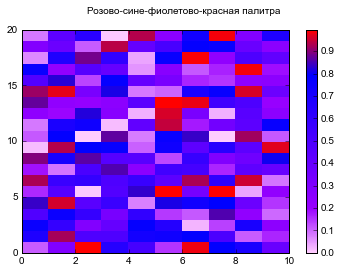

In [6]:
# Пример 5.4.3

import matplotlib as mpl
import matplotlib.pyplot as plt

# розовый [255, 204, 255] -> [1., 0.8, 1.]
# фиолетовый [153, 0, 255] -> [0.6, 0., 1.]
# синий [0, 0, 255] -> [0., 0., 1.]
# красный [255, 0, 0] -> [1., 0., 0.]

cdict1 = {'red':   ((0.0, 1.0, 1.0), # red in RGB of pink, розовый
                   (0.2, 0.6, 0.6), # red in RGB of blue синий 
                   (0.8, 0.0, 0.0),  # red in RGB of violet фиолетовый 
                   (1.0, 1.0, 1.0)),  # red in RGB of red красный  

         'green':  ((0.0, 0.8, 0.8), # green in RGB of pink, розовый
                   (0.2, 0.0, 0.0), # green in RGB of blue синий 
                   (0.8, 0.0, 0.0), # green in RGB of violet фиолетовый 
                   (1.0, 0.0, 0.0)), # green in RGB of red красный  

         'blue':  ((0.0, 1.0, 1.0), # blue in RGB of pink, розовый
                   (0.2, 1.0, 1.0), # blue in RGB of blue синий 
                   (0.8, 1.0, 1.0), # blue in RGB of violet фиолетовый
                   (1.0, 0.0, 0.0)) # blue in RGB of red красный  
          }

cmap1 = mpl.colors.LinearSegmentedColormap('cmap1', cdict1)
plt.register_cmap(cmap=cmap1)
# ---------------------------------------------------------

fig = plt.figure()

ax = fig.add_subplot(111)

cmaplist = plt.cm.datad

cf = ax.pcolor(dat, cmap=cmap1)        
cbar = fig.colorbar(cf, ax=ax)
plt.suptitle(u'Розово-сине-фиолетово-красная палитра')

save('pic_4_4_3', fmt='png')
save('pic_4_4_3', fmt='pdf')

plt.show()

Исследователь Крис Слокум из государственного университета Колорадо [на своём сайте](http://schubert.atmos.colostate.edu/~cslocum/custom_cmap.html) предложил код функции, которая перерабатывает заданный список цветов RGB в относительные единицы и создаёт как равномерную, так и не равномерную цветовую палитры. Это намного удобнее для создания собственной цветовой палитры, когда можно воспользоваться списками RGB из различных источников (см. список электронных ресурсов) и не задавть cdict вручную или писать собственную функцию. 

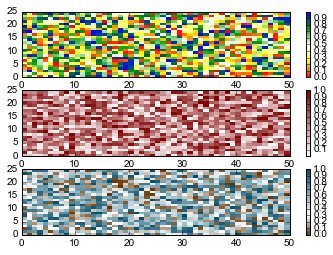

In [7]:
# Пример 4.4.4 - взят с http://schubert.atmos.colostate.edu/~cslocum/custom_cmap.html

'''
NAME
    Custom Colormaps for Matplotlib
PURPOSE
    This program shows how to implement make_cmap which is a function that
    generates a colorbar.  If you want to look at different color schemes,
    check out https://kuler.adobe.com/create.
PROGRAMMER(S)
    Chris Slocum
REVISION HISTORY
    20130411 -- Initial version created
    20140313 -- Small changes made and code posted online
    20140320 -- Added the ability to set the position of each color
    20150503 -- Shabanov P.A.: added debug parameter
'''

def make_cmap(colors, position=None, bit=False, debug=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if(debug):
        print 'position:', position
        print 'len colors', len(colors)
        
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    if(debug):
        print 'colors', colors
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    if (debug): 
        print 'red', cdict['red']
        print 'green', cdict['green']
        print 'blue', cdict['blue']

        
    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

### An example of how to use make_cmap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(311)
### Create a list of RGB tuples
# 'r', 'y', 'w', 'g', 'b'
colors = [(255,0,0), (255,255,0), (255,255,255), (0,157,0), (0,0,255)] # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
### Use your colormap
plt.pcolor(np.random.rand(25,50), cmap=my_cmap)
plt.colorbar()

ax = fig.add_subplot(312)
colors = [(1,1,1), (0.5,0,0)] # This example uses the arithmetic RGB
### If you are only going to use your colormap once you can
### take out a step.
plt.pcolor(np.random.rand(25,50), cmap=make_cmap(colors))
plt.colorbar()

ax = fig.add_subplot(313)
colors = [(0.4,0.2,0.0), (1,1,1), (0,0.3,0.4)]
### Create an array or list of positions from 0 to 1.
position = [0, 0.3, 1]
plt.pcolor(np.random.rand(25,50), cmap=make_cmap(colors, position=position))
plt.colorbar()

save('pic_4_4_4', fmt='png')
save('pic_4_4_4', fmt='pdf')

plt.show()

### 4.5 Дискретная цветовая палитра

Плавная палитра, несомненно, лучше смотрятся при отображении трёхмерных поверхностей в виде плоских карт и 3D графиков. Однако в научной графике часто требуется не столько красота, сколько простота и однозначность рисунка. Чтобы избежать споров при определении оттенков и, соответственно, значений поля, следует использовать дискретные палитры там, где это критично.

Дискретная палитра представляет собой набор цветов с чёткой границей между соседними оттенками. Обычно этот набор берётся из одной из непрерывных шкал, но можно задать свою последовательность цветов либо в RGB, либо в HEX форматах. 

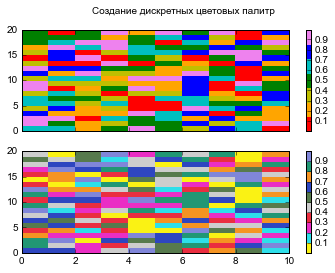

In [8]:
# Пример 4.5.1

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

dat = np.random.random(200).reshape(20,10) # создаём матрицу значений

N = 10
# Список цветов
cpool = [ '#bd2309', '#bbb12d', '#1480fa', '#14fa2f', '#000000',
          '#faf214', '#2edfea', '#ea2ec4', '#ea2e40', '#cdcdcd',
          '#577a4d', '#2e46c0', '#f59422', '#219774', '#8086d9' ]
# Создание дискретных colormap
cmap1 = mpl.colors.ListedColormap(['r','orange','y','g','c','b','violet'], 'indexed')
cmap2 = mpl.colors.ListedColormap(cpool[5:5+N], 'indexed')

#plt.register_cmap(cmap=cmap3)

fig, axes= plt.subplots(nrows=2, ncols=1, sharex=True)

cmaps = [cmap1, cmap2]

for i, ax in enumerate(fig.axes):
    cf = ax.pcolor(dat, cmap=cmaps[i])        
    fig.colorbar(cf, ax=ax)

fig.suptitle(u'Создание дискретных цветовых палитр')

save('pic_4_5_1', fmt='png')
save('pic_4_5_1', fmt='pdf')

plt.show()

При задании дискретной палитры необходимо обращать внимание на согласованность границ делений цветовой шкалы и границ цветов, иначе анализ рисунка будет серьёзно затруднён. На плавной цветовой шкале это не так заметно, как на дискретной.

Для задания положения делений в методе fig.colorbar() или plt.colorbar() необходимо указать параметр ticks. Число положений делений должно быть на 1 больше числа цветов в палитре (делений на отрезке на одну больше, чем промежутков между ними)!

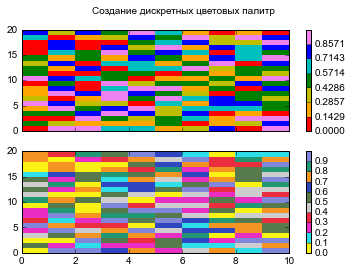

In [9]:
# Пример 4.5.2

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

dat = np.random.random(200).reshape(20,10) # создаём матрицу значений

N = 10
# Список цветов в HEX формате
cpool = [ '#bd2309', '#bbb12d', '#1480fa', '#14fa2f', '#000000',
          '#faf214', '#2edfea', '#ea2ec4', '#ea2e40', '#cdcdcd',
          '#577a4d', '#2e46c0', '#f59422', '#219774', '#8086d9' ]

# Создание дискретных colormap
cmap1 = mpl.colors.ListedColormap(['r','orange','y','g','c','b','violet'], 'indexed')   # 7 цветов
cmap2 = mpl.colors.ListedColormap(cpool[5:5+N], 'indexed')   # 10 цветов

fig, axes= plt.subplots(nrows=2, ncols=1, sharex=True)

cmaps = [cmap1, cmap2]

for i, ax in enumerate(fig.axes):
    cf = ax.pcolor(dat, cmap=cmaps[i])        
    if(i == 0):
        fig.colorbar(cf, ax=ax, ticks=np.linspace(0, 1, 7+1))
    else:
        fig.colorbar(cf, ax=ax)
        
plt.suptitle(u'Создание дискретных цветовых палитр')

save('pic_4_5_2', fmt='png')
save('pic_4_5_2', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

> + [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)